In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm, beta
from numpy import *

In [16]:
# 正規分布に従って移動(Gibbs Sampler)
N = 1000
rho = 0.8
sigma = array([1, 2])
mu = array([0, 10])
Sigma = array([[sigma[0]**2, sigma[0]*sigma[1]*rho],
               [sigma[0]*sigma[1]*rho, sigma[1]**2]])
x = zeros((N, 2))
ff = empty(N-1)

Sinv = linalg.inv(Sigma)
def myf(x): return exp(-0.5*dot(dot((x-mu).T, Sinv), (x-mu)))


def h1(x): return mu[0]+sigma[0]/sigma[1]*rho * \
    (x-mu[1])+random.randn(1)*sigma[0]**2*(1-rho**2)


def h2(x): return mu[1]+sigma[1]/sigma[0]*rho * \
    (x-mu[0])+random.randn(1)*sigma[1]**2*(1-rho**2)


for i in range(N-1):
    if i%2==0:
        x[i+1,0] = h1(x[i,1])
        x[i+1,1] = x[i,1]
    else:
        x[i+1,1] = h2(x[i,0])
        x[i+1,0] = x[i,0]
    ff[i] = myf(x[i])

plt.plot(x[:, 0], x[:, 1], linewidth=0.2)
plt.show()
plt.plot(log(ff), linewidth=0.3)
plt.show()
print(mean(x,axis=0))
print(cov(x.T))

[-0.06282483  9.88027778]
[[0.88274613 1.64346146]
 [1.64346146 4.56172558]]


In [17]:
# イジング模型

In [12]:
# 初期画像
m1 = 50
m2 = 50
x0 = where(random.rand(50, 50) > 1/2, 1, -1)
plt.imshow(x0)
gamma = 1


def mylogf(x):
    q = 0
    for i in range(m1):
        for j in range(m2):
            vx = [1, 0, -1, 0]
            vy = [0, 1, 0, -1]
            s = 0
            for k in range(4):
                s += x[(i+vx[k])%m1, (j+vy[k])%m2]
            q += x[i, j]*s
    return gamma*q/2

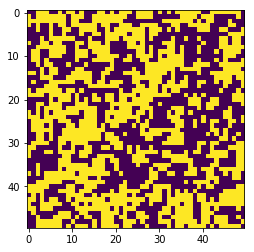

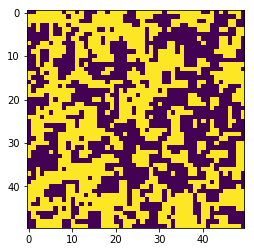

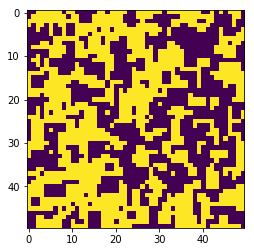

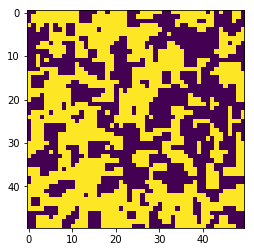

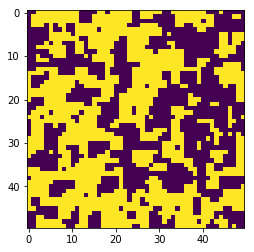

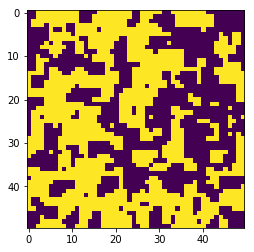

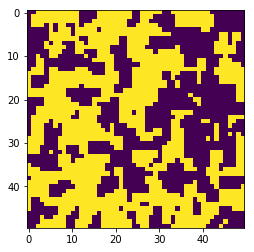

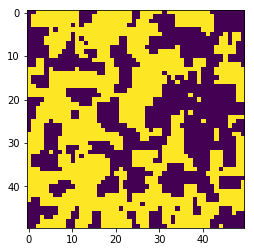

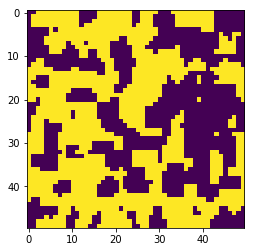

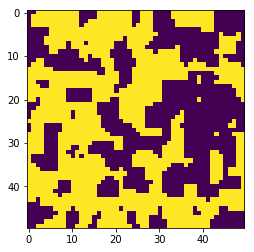

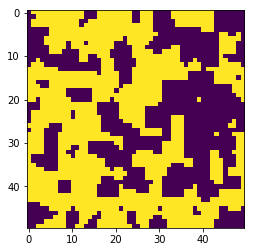

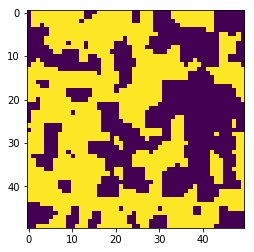

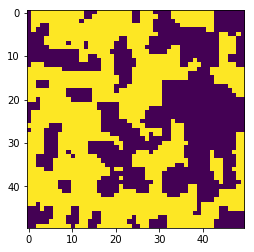

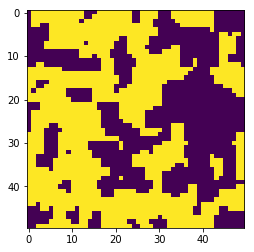

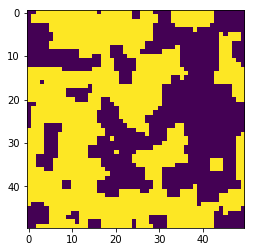

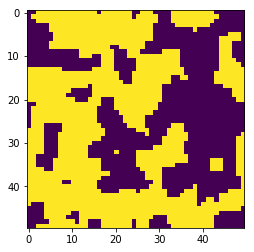

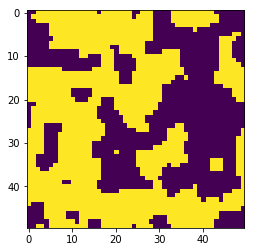

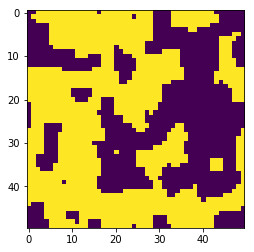

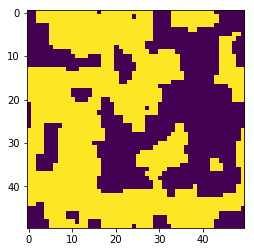

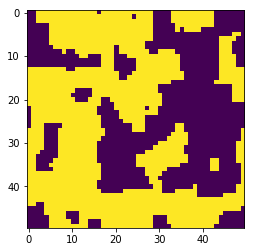

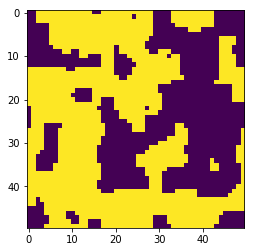

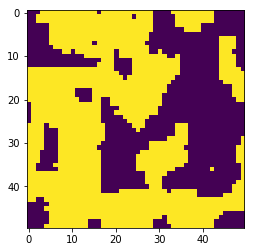

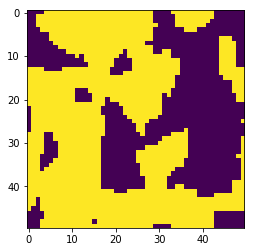

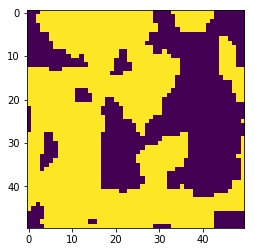

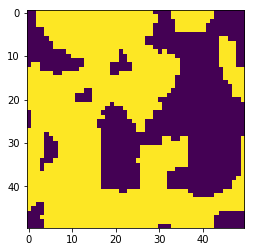

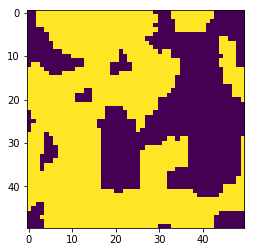

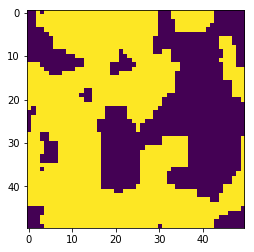

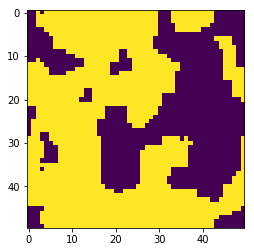

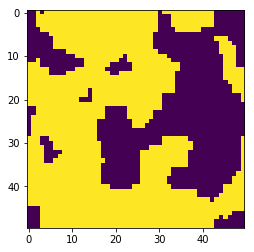

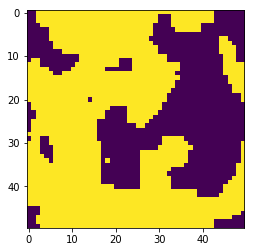

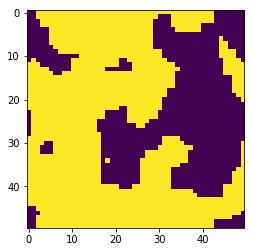

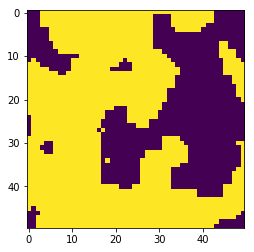

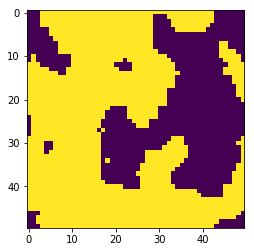

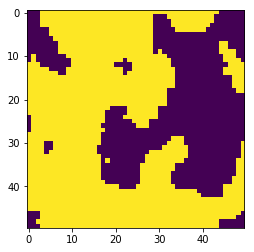

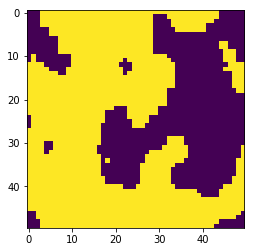

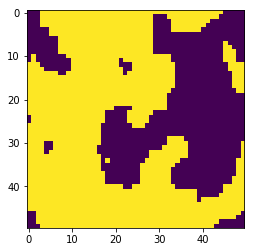

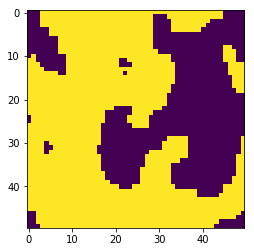

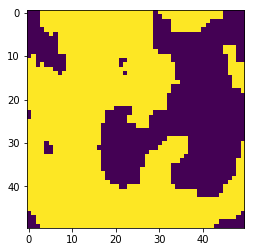

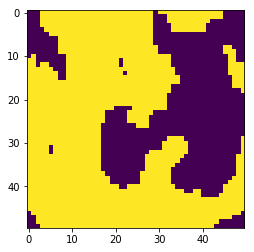

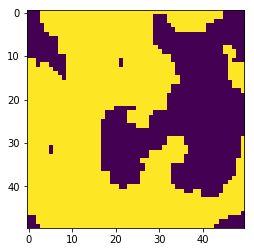

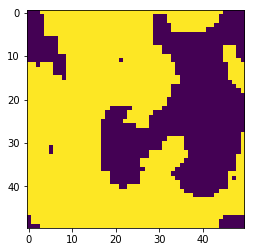

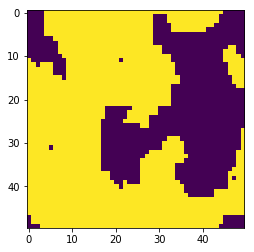

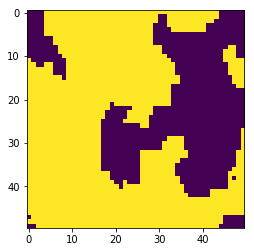

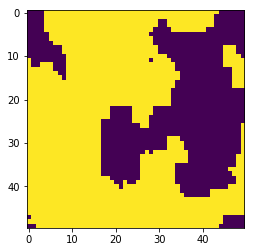

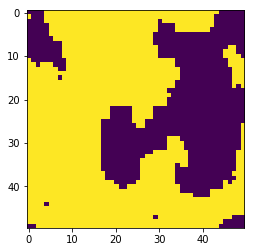

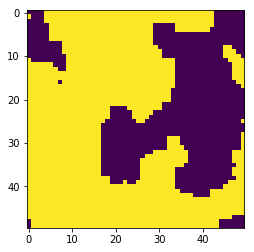

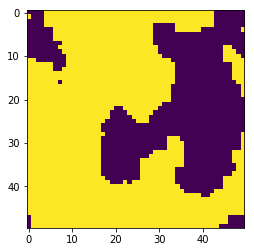

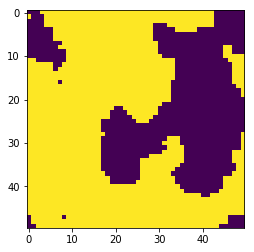

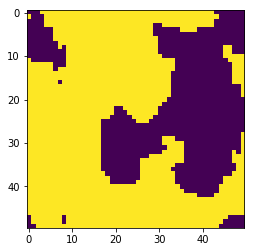

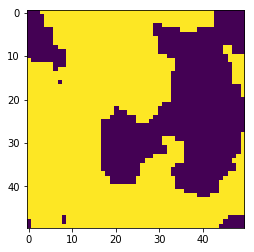

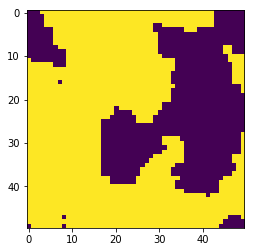

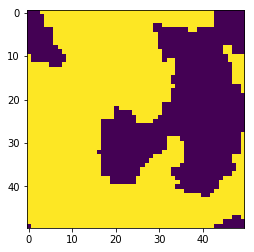

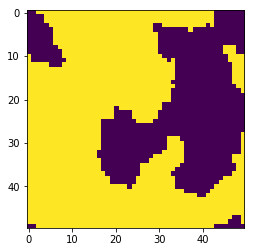

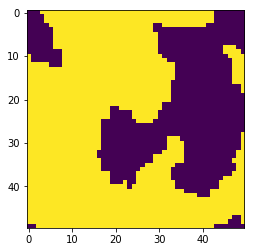

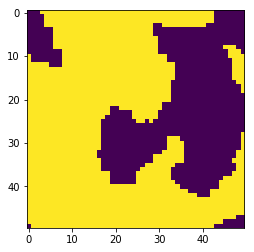

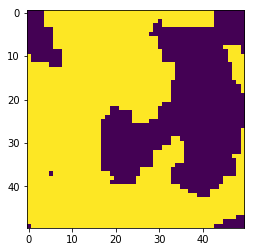

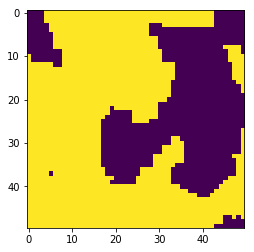

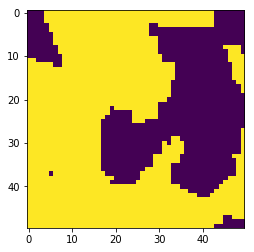

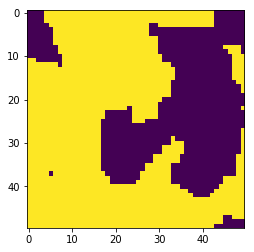

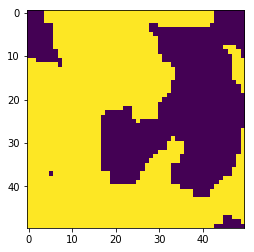

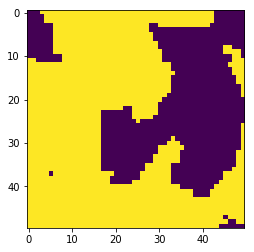

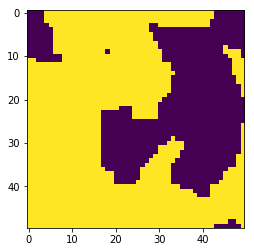

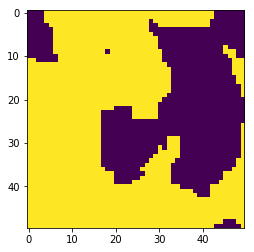

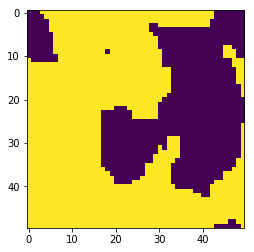

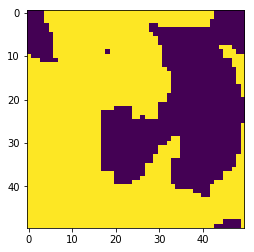

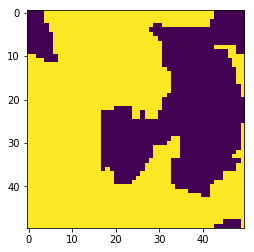

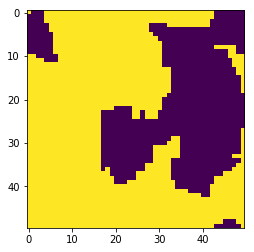

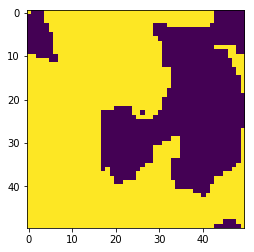

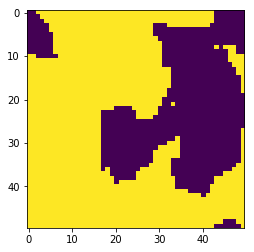

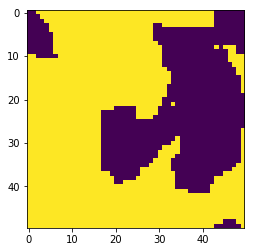

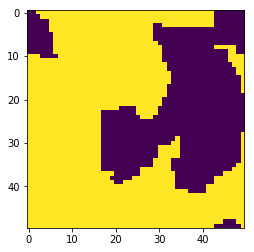

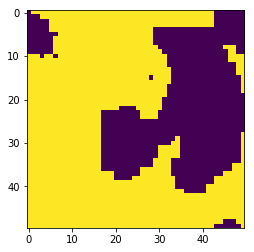

In [13]:
#実行には少し時間がかかる...のでNとnsを1/10にしてある
#興味があればきちんと10倍して計算して欲しい
N = 100000
ns = 1000
ff = empty(N//ns+1)
xx = empty(((N//ns)+1, m1, m2))
x = x0
xx[0] = x
vx = [1, 0, -1, 0]
vy = [0, 1, 0, -1]
for t in range(N):
    i1 = random.randint(m1)
    i2 = random.randint(m2)
    s = 0
    for k in range(4):
        s += x[(i1+vx[k])%m1, (i2+vy[k])%m2]
    b = exp(s*gamma)
    p = b/(b+(1/b))
    x[i1, i2] = random.choice([1,-1], p=[p, 1-p])
    if t % ns == 0:
        ff[t//ns] = mylogf(x)
        xx[t//ns] = x
        plt.imshow(x)
        plt.show()

In [33]:
#インタラクティブに変化を見る。ipywidgetsが必要
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

@interact(n=(0,100))#この程度ですでにおおかたの変化は終了している
def showmagnetimage(n):
    plt.imshow(xx[n])

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

In [47]:
アニメーションで変化を見るためには、animate.pyを実行すると、gifファイルが保存される。